# Cardiovascular Disease Prediction

## I.Prepocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardio-train/cardio_train.csv


**All Imports are here**


In [2]:
! pip install scikeras
! pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from kmodes.kmodes import KModes
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras import activations
from keras import backend
from keras import callbacks
from keras import layers
from keras import losses
from keras import models
from keras import utils
from keras import optimizers
from scikeras.wrappers import KerasClassifier

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


**Load the dataset**

In [3]:
data = pd.read_csv("/kaggle/input/cardio-train/cardio_train.csv")
data.drop("id",axis=1,inplace=True)
display(data)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,PP,MAP,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,30,90.000000,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,50,106.666667,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,60,90.000000,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,50,116.666667,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,40,73.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,40,93.333333,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,50,106.666667,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,90,120.000000,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,55,98.333333,1


In [4]:
features=["ap_hi","ap_lo","PP","MAP"]
for i in features:
  data = data.drop(data[data[i]<0].index)
  data = data.drop(data[data[i]>500].index)
print(data.shape)

(68727, 14)


## II.Exploratory Data Analysis

**Class-Imbalance Checking**

Text(0.5, 1.0, 'Distribution of people with and without CVD')

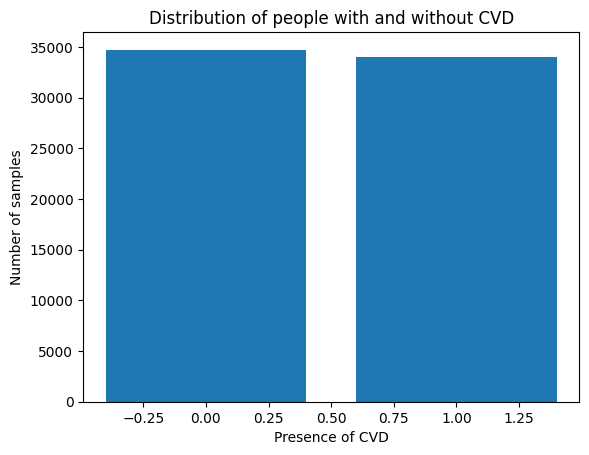

In [5]:
y = data["cardio"]
unique_labels,counts = np.unique(y,return_counts=True)

plt.bar(unique_labels,counts)
plt.xlabel("Presence of CVD")
plt.ylabel('Number of samples')
plt.title("Distribution of people with and without CVD")

**Multi-variate Analysis**

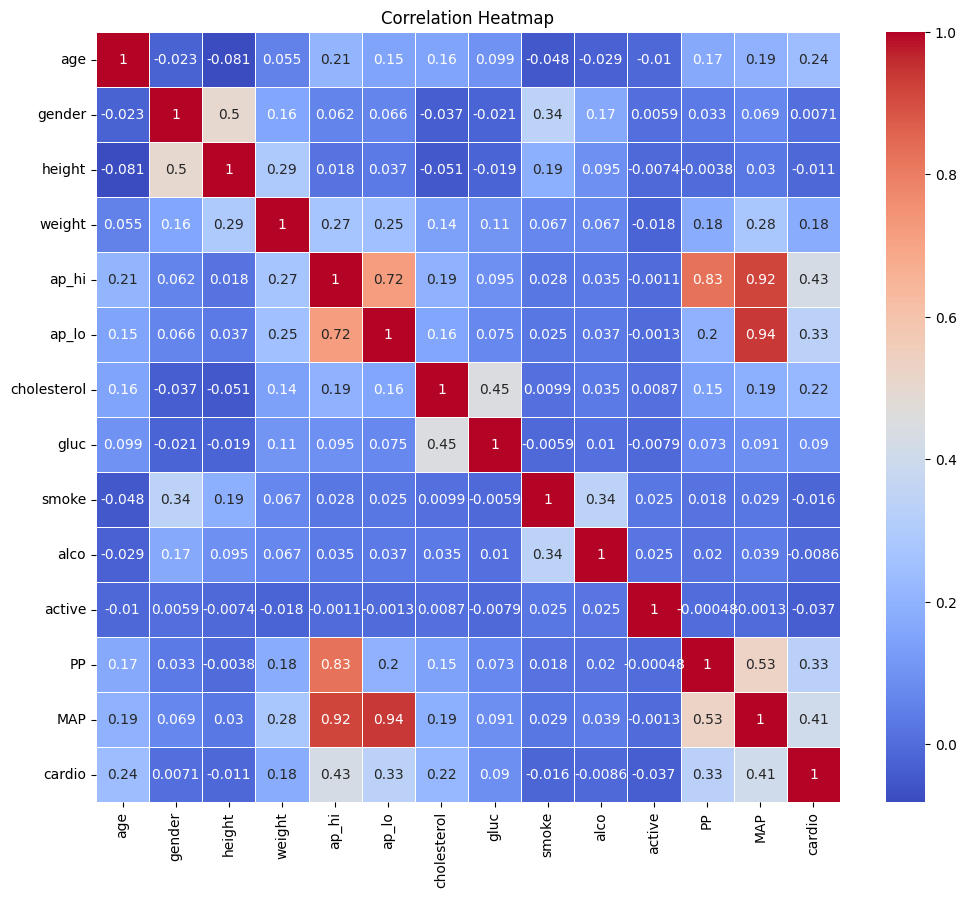

In [6]:
# Corelation HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


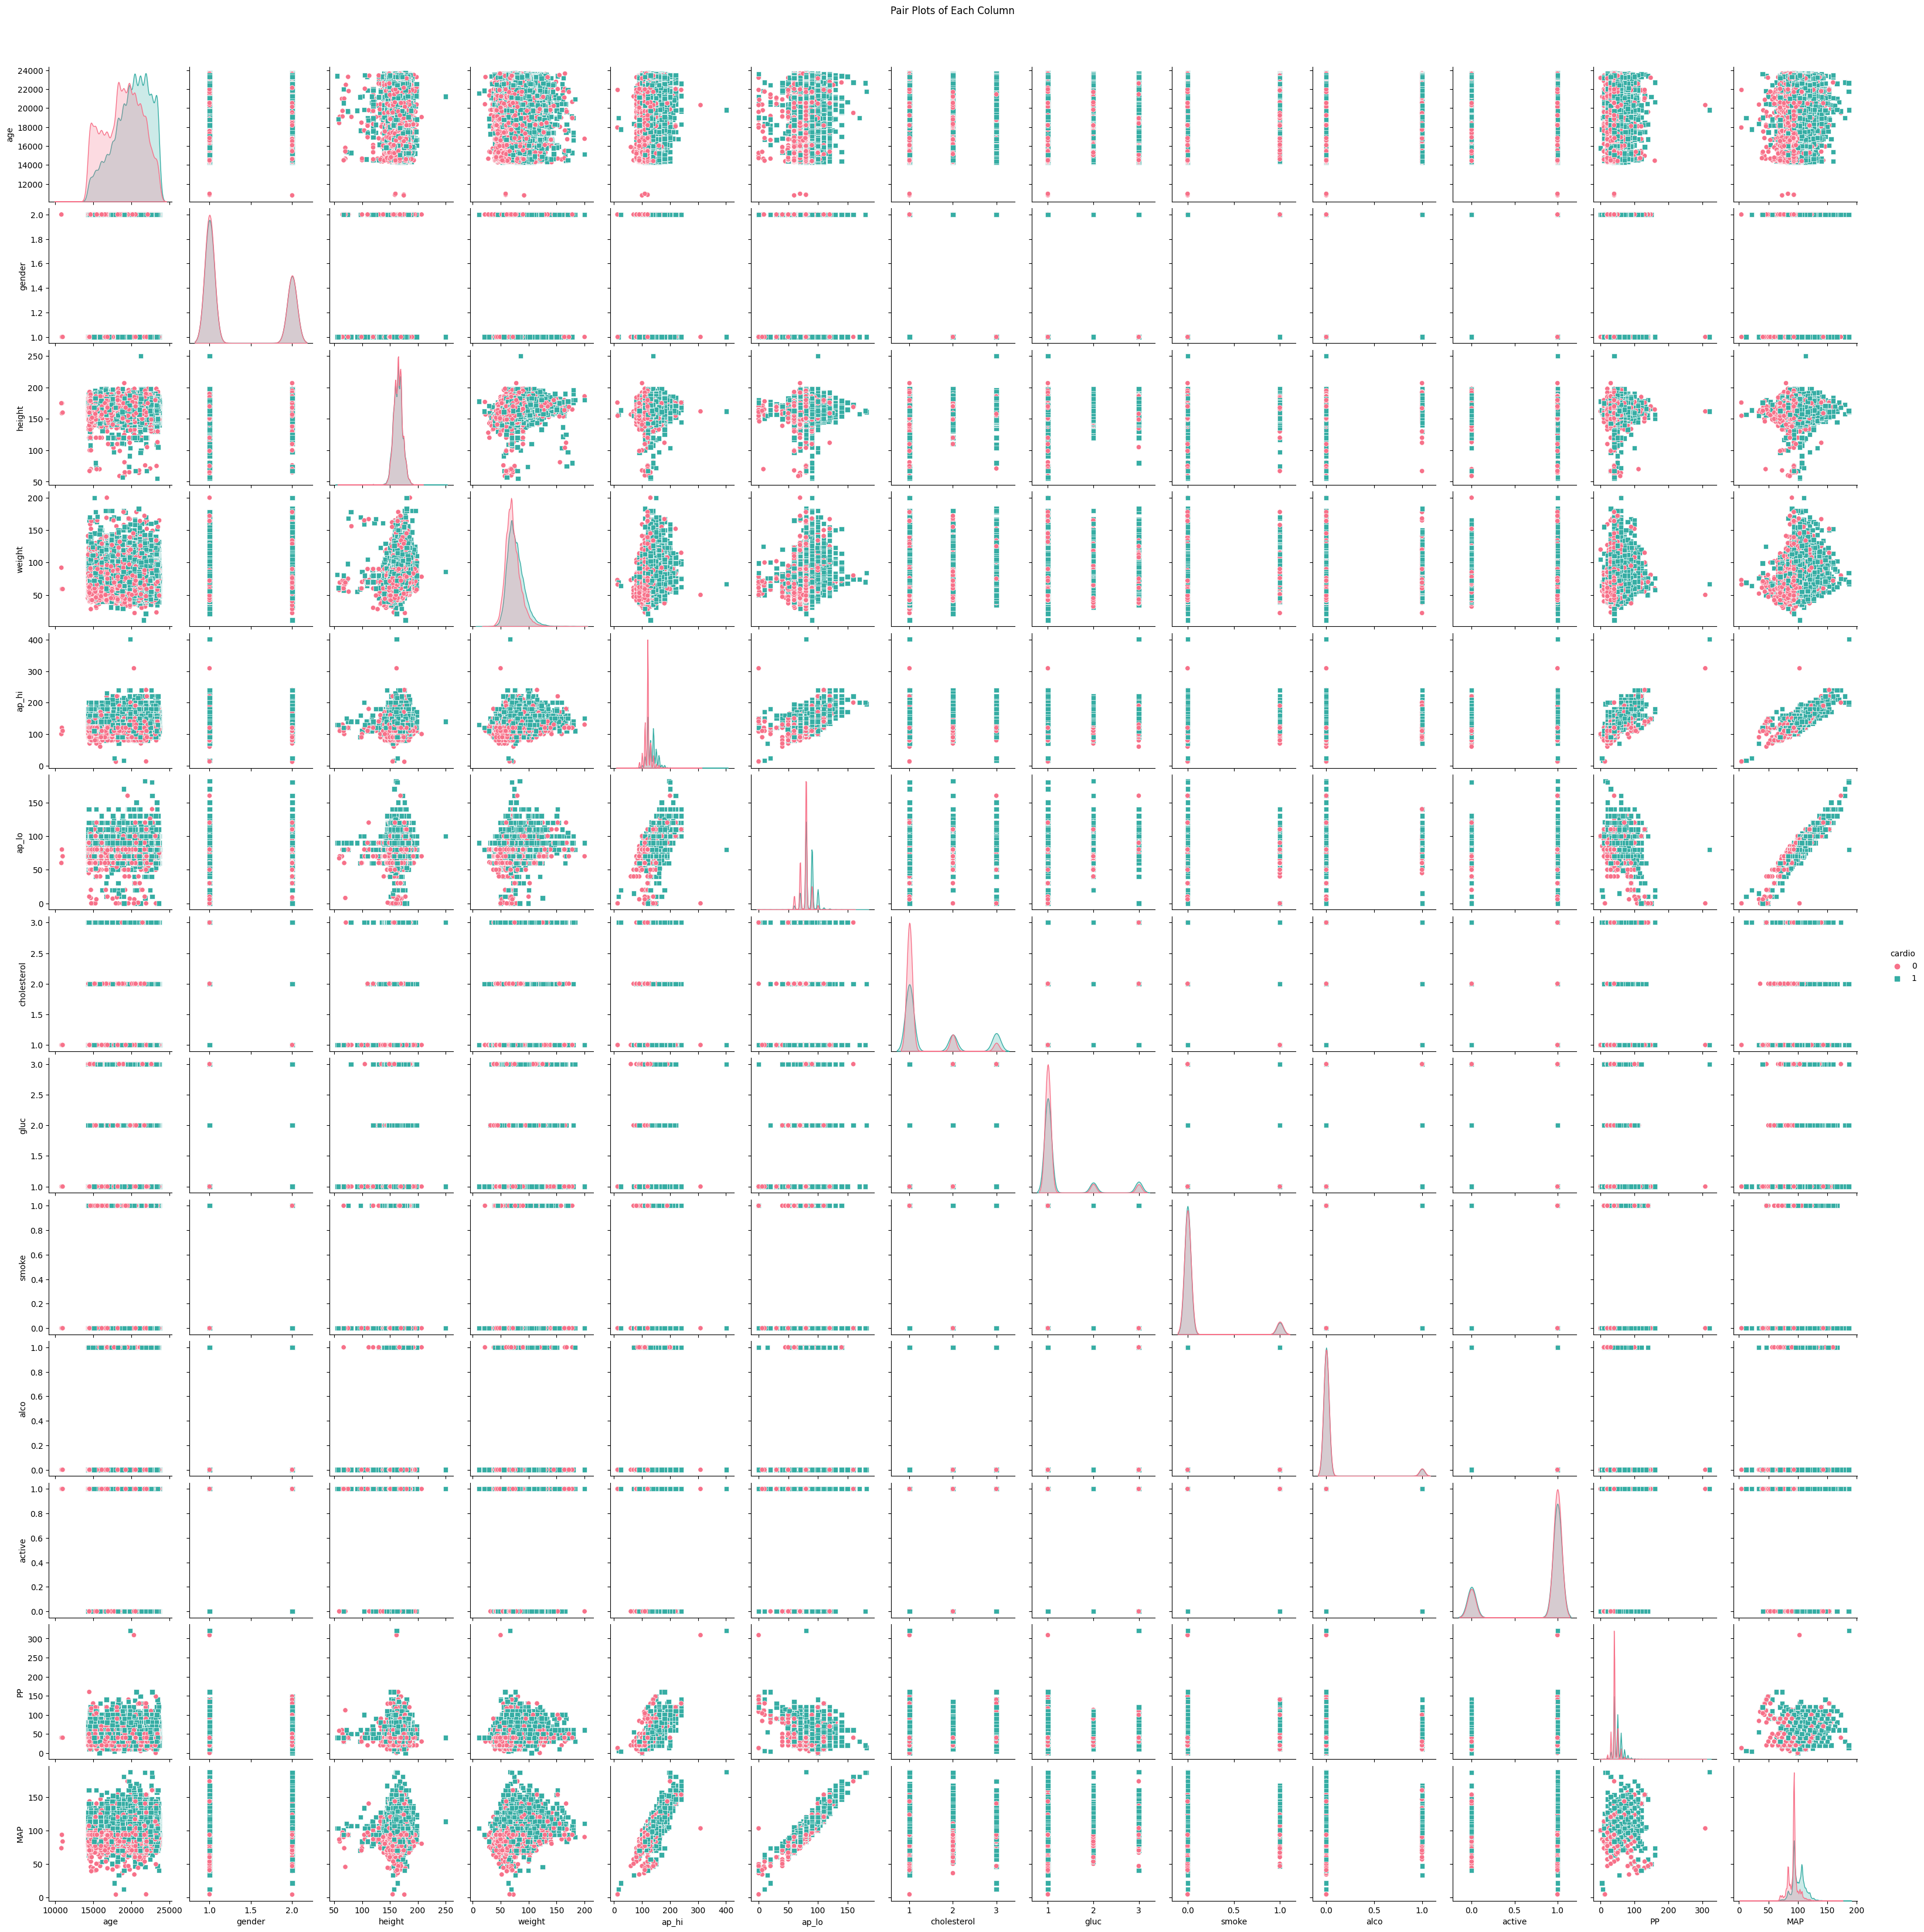

In [7]:
sns.pairplot(data, diag_kind='kde', hue='cardio', palette='husl', markers=['o', 's'])
plt.suptitle("Pair Plots of Each Column", y=1.02)
plt.show()

**Uni-Variate Analysis**

Box-Plots

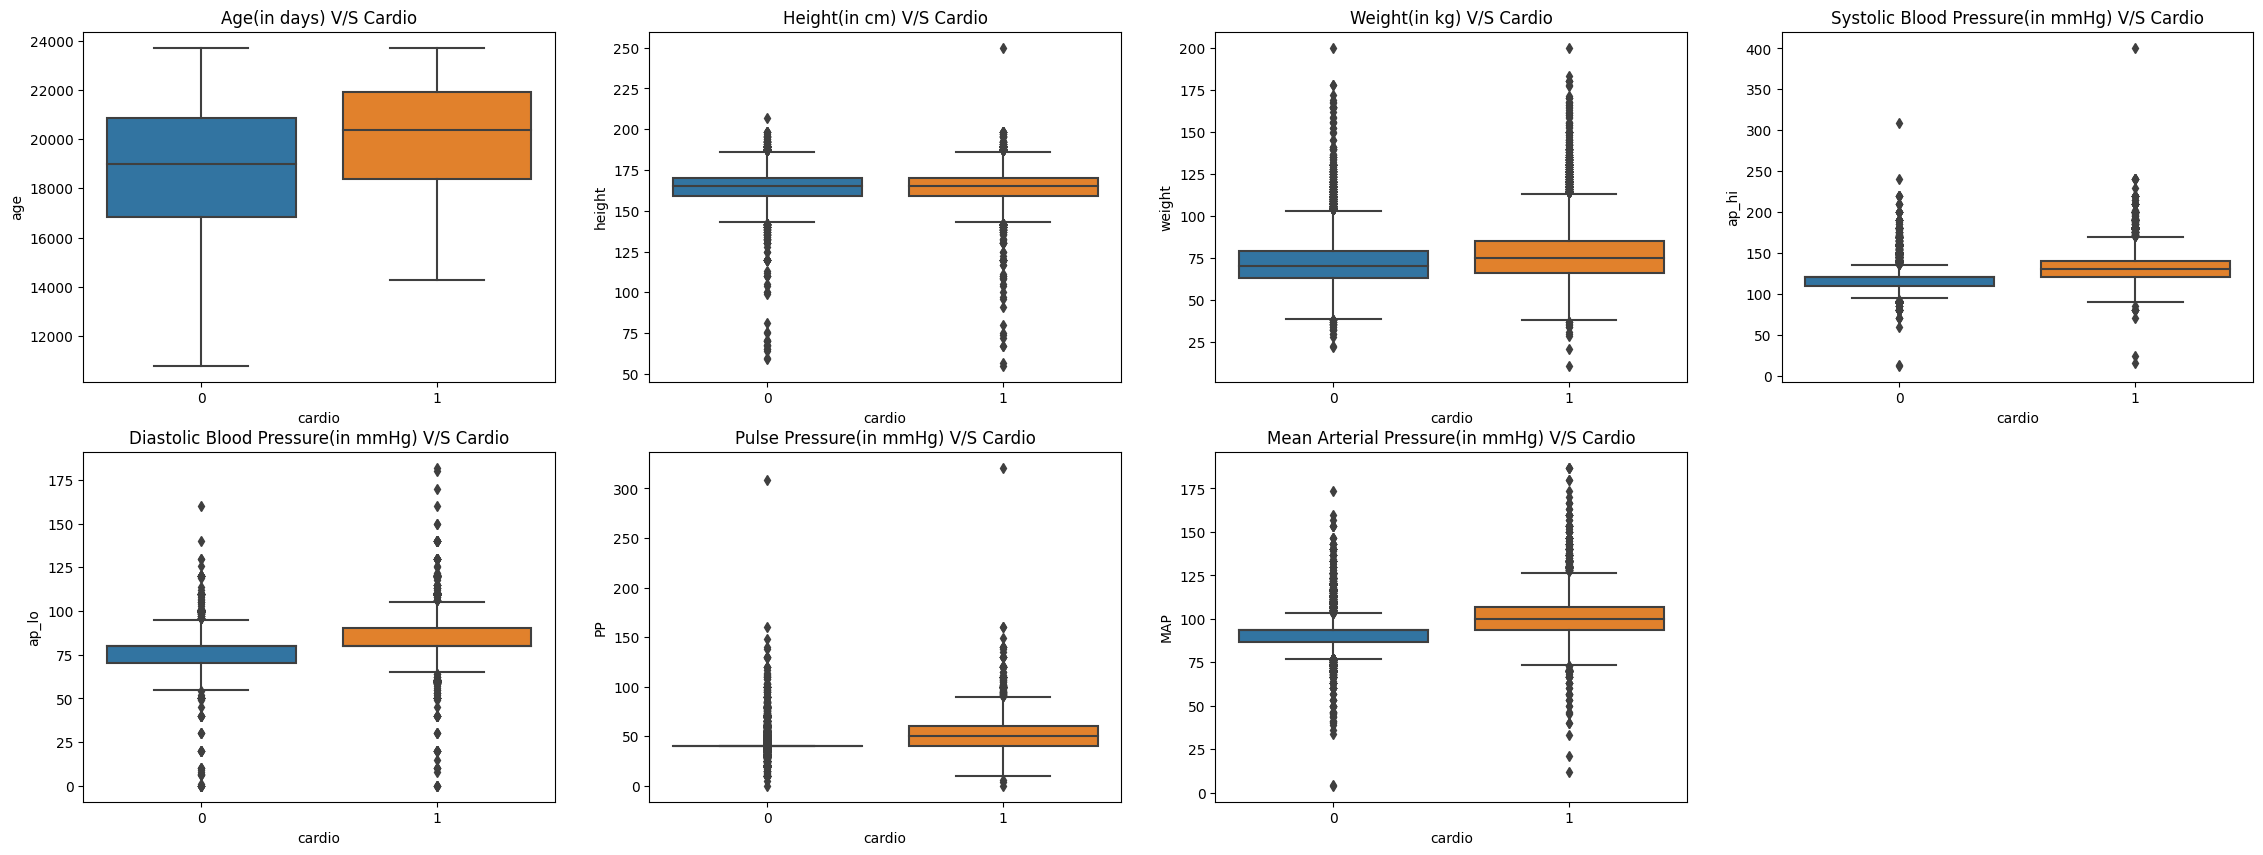

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(28, 10))
sns.boxplot(ax=axes[0,0],x="cardio",y="age",data=data)
sns.boxplot(ax=axes[0,1],x="cardio",y="height",data=data)
sns.boxplot(ax=axes[0,2],x="cardio",y="weight",data=data)
sns.boxplot(ax=axes[0,3],x="cardio",y="ap_hi",data=data)
sns.boxplot(ax=axes[1,0],x="cardio",y="ap_lo",data=data)
sns.boxplot(ax=axes[1,1],x="cardio",y="PP",data=data)
sns.boxplot(ax=axes[1,2],x="cardio",y="MAP",data=data)
axes[0,0].set_title("Age(in days) V/S Cardio")
axes[0,1].set_title("Height(in cm) V/S Cardio")
axes[0,2].set_title("Weight(in kg) V/S Cardio")
axes[0,3].set_title("Systolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,0].set_title("Diastolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,1].set_title("Pulse Pressure(in mmHg) V/S Cardio")
axes[1,2].set_title("Mean Arterial Pressure(in mmHg) V/S Cardio")
fig.delaxes(axes[1,3])
plt.show()

### **Histograms**

**Combined Histograms for the report**

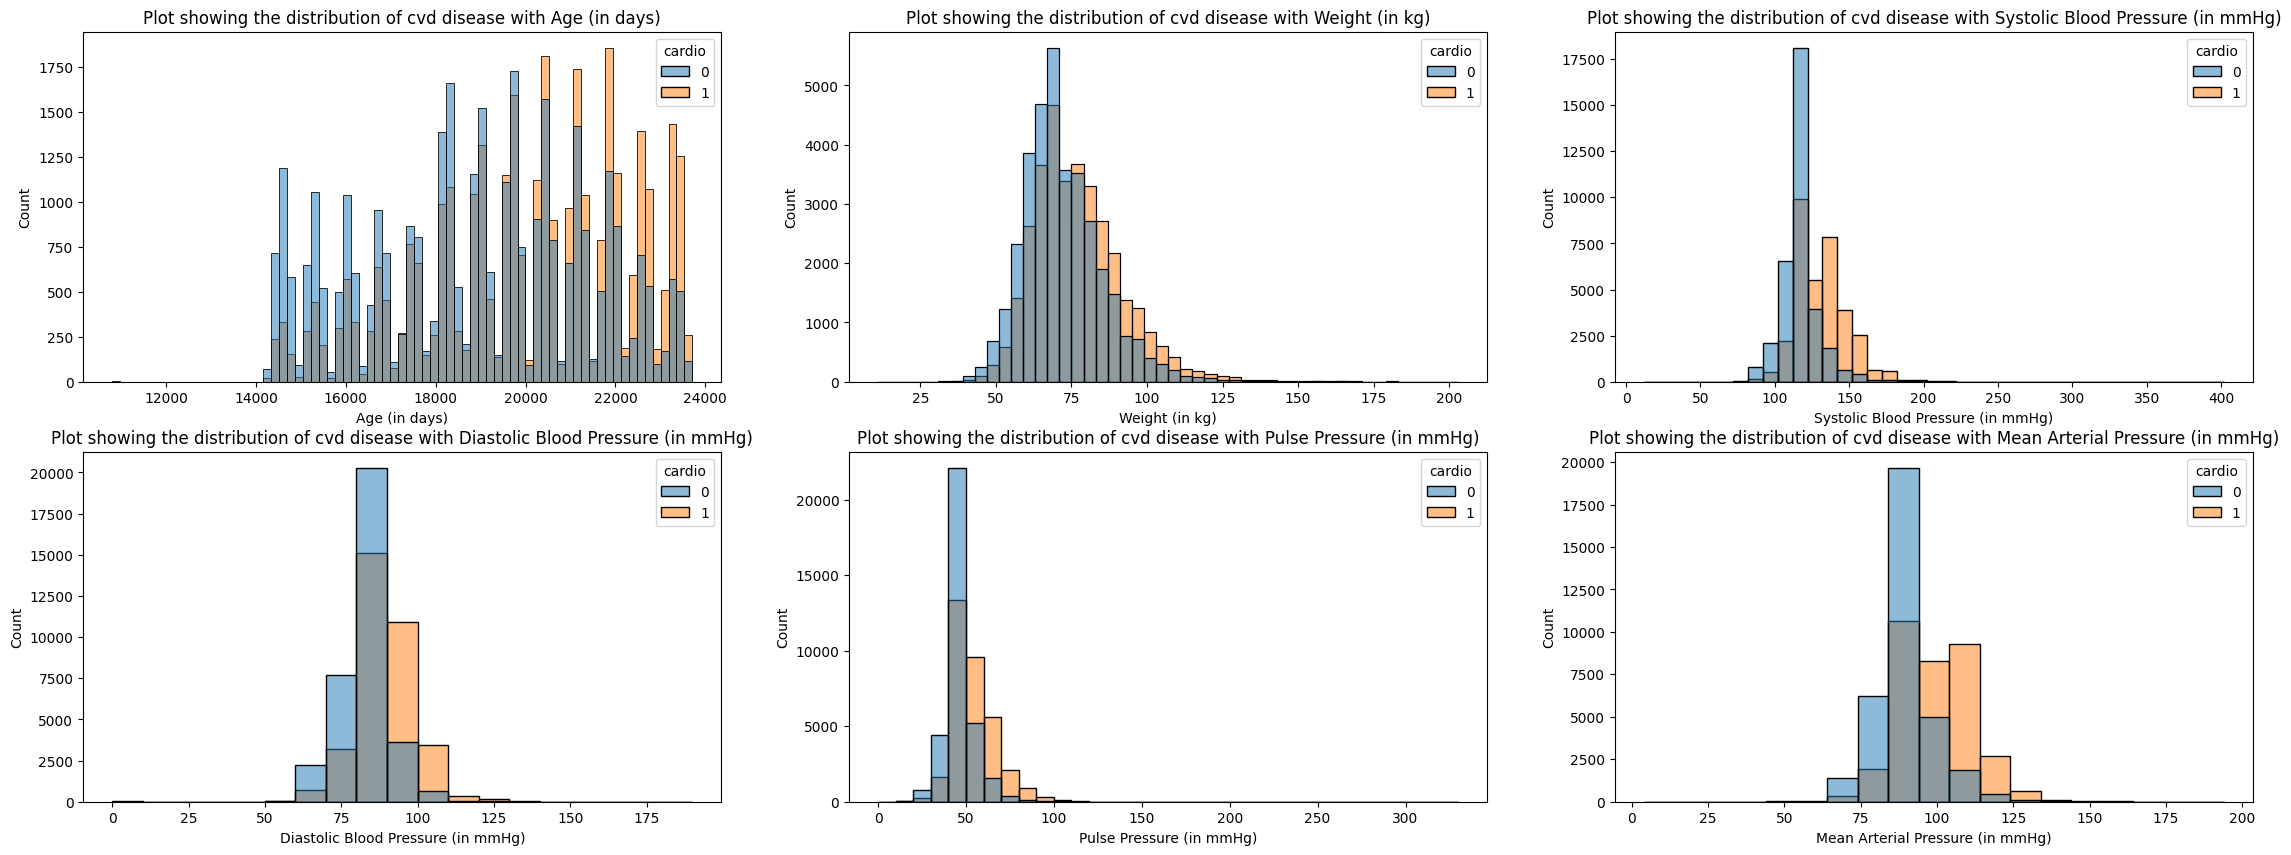

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(28, 10))
sns.histplot(ax=axes[0,0],x="age",hue="cardio",data=data)
axes[0,0].set_xlabel("Age (in days)")
axes[0,0].set_title("Plot showing the distribution of cvd disease with Age (in days)")
sns.histplot(ax=axes[0,1],x="weight",hue="cardio",data=data,binwidth=4.0)
axes[0,1].set_xlabel("Weight (in kg)")
axes[0,1].set_title("Plot showing the distribution of cvd disease with Weight (in kg)")
sns.histplot(ax=axes[0,2],x="ap_hi",hue="cardio",data=data,binwidth=10.0)
axes[0,2].set_xlabel("Systolic Blood Pressure (in mmHg)")
axes[0,2].set_title("Plot showing the distribution of cvd disease with Systolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,0],x="ap_lo",hue="cardio",data=data,binwidth=10.0)
axes[1,0].set_xlabel("Diastolic Blood Pressure (in mmHg)")
axes[1,0].set_title("Plot showing the distribution of cvd disease with Diastolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,1],x="PP",hue="cardio",data=data,binwidth=10.0)
axes[1,1].set_xlabel("Pulse Pressure (in mmHg)")
axes[1,1].set_title("Plot showing the distribution of cvd disease with Pulse Pressure (in mmHg)")
sns.histplot(ax=axes[1,2],x="MAP",hue="cardio",data=data,binwidth=10.0)
axes[1,2].set_xlabel("Mean Arterial Pressure (in mmHg)")
axes[1,2].set_title("Plot showing the distribution of cvd disease with Mean Arterial Pressure (in mmHg)")
plt.figure(dpi=100)
plt.show()

### **Pie-Charts**

**Combined Pie-Charts for Report**

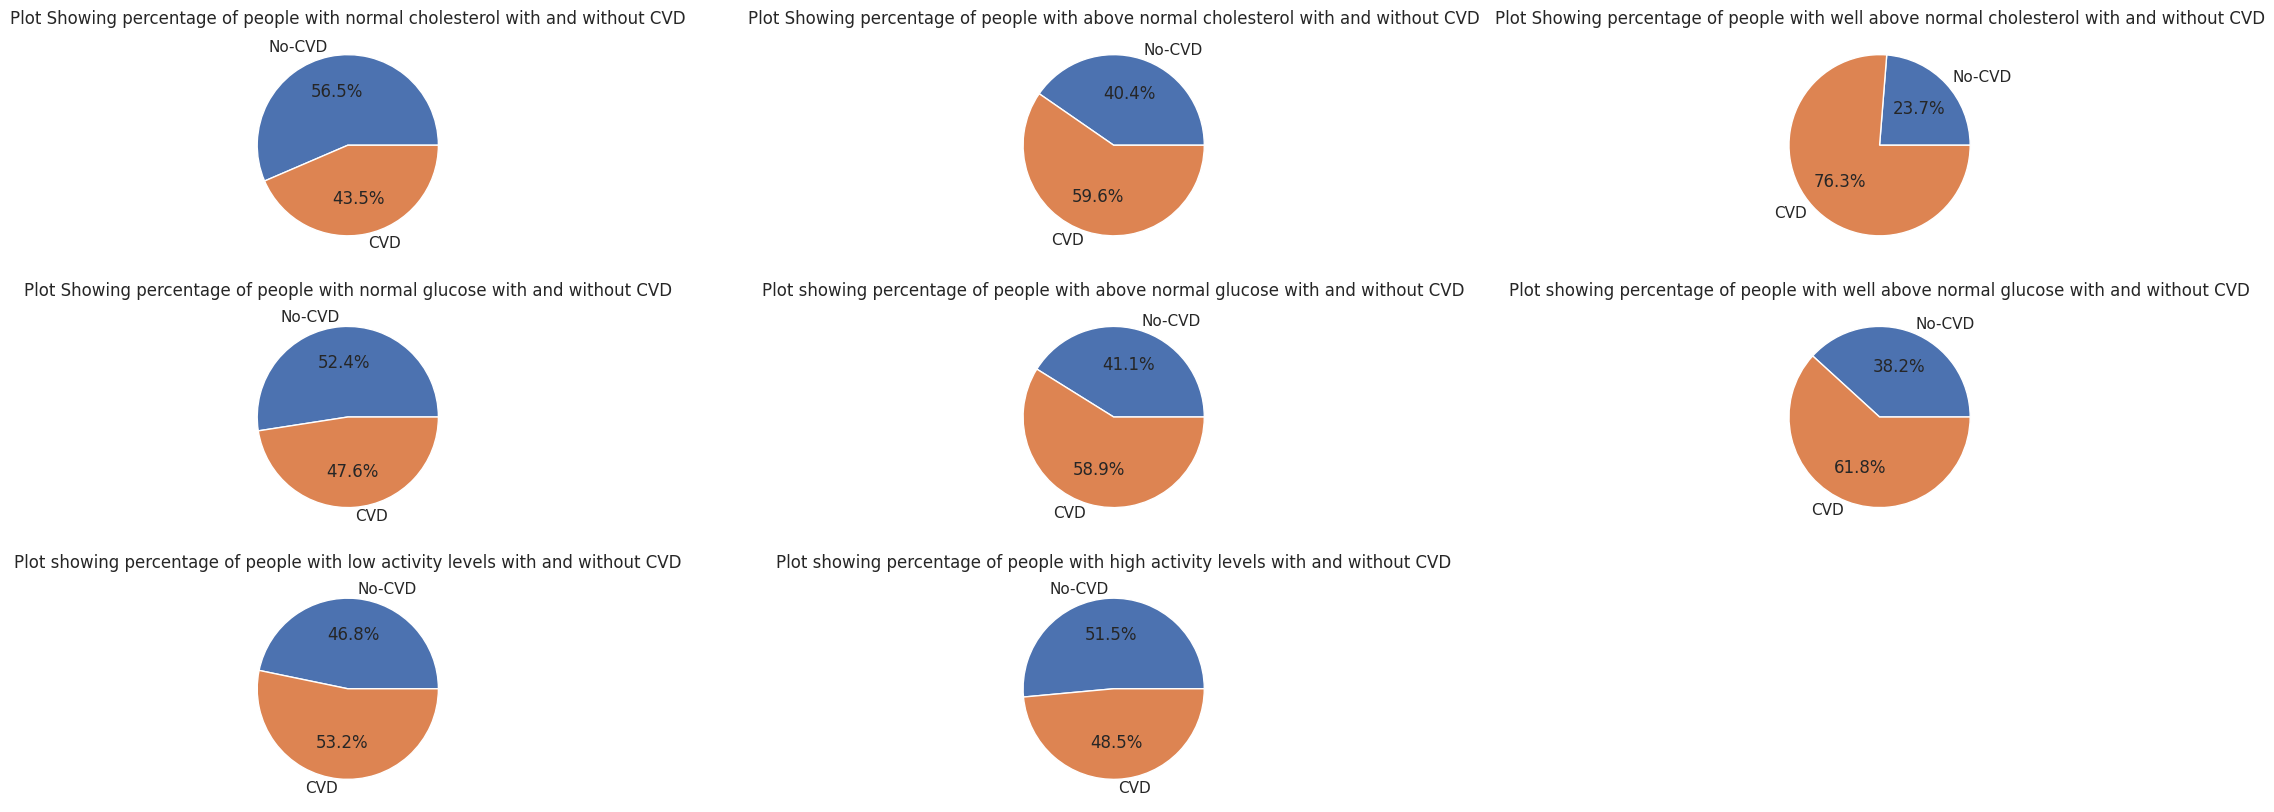

In [17]:
CVD=["No-CVD","CVD"]

count_no_cvd_cholesterol_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
count_no_cvd_cholesterol_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
count_no_cvd_cholesterol_well_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] ==3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]

count_no_cvd_glucose_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
count_no_cvd_glucose_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
count_no_cvd_glucose_well_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]


count_no_cvd_less_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
count_no_cvd_high_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]


fig, axes = plt.subplots(3, 3, figsize=(28, 10))
axes[0,0].pie(count_no_cvd_cholesterol_normal,labels=CVD,autopct='%1.1f%%')
axes[0,0].set_title("Plot Showing percentage of people with normal cholesterol with and without CVD")
axes[0,1].pie(count_no_cvd_cholesterol_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,1].set_title("Plot Showing percentage of people with above normal cholesterol with and without CVD")
axes[0,2].pie(count_no_cvd_cholesterol_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,2].set_title("Plot Showing percentage of people with well above normal cholesterol with and without CVD")
axes[1,0].pie(count_no_cvd_glucose_normal,labels=CVD,autopct='%1.1f%%')
axes[1,0].set_title("Plot Showing percentage of people with normal glucose with and without CVD")
axes[1,1].pie(count_no_cvd_glucose_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,1].set_title("Plot showing percentage of people with above normal glucose with and without CVD")
axes[1,2].pie(count_no_cvd_glucose_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,2].set_title("Plot showing percentage of people with well above normal glucose with and without CVD")
axes[2,0].pie(count_no_cvd_less_activity,labels=CVD,autopct='%1.1f%%')
axes[2,0].set_title("Plot showing percentage of people with low activity levels with and without CVD")
axes[2,1].pie(count_no_cvd_high_activity,labels=CVD,autopct='%1.1f%%')
axes[2,1].set_title("Plot showing percentage of people with high activity levels with and without CVD")
fig.delaxes(axes[2,2])
plt.show()

## III.Analysis of the dataset

**People with  no CVD**

In [28]:
mask_0 = (data['cardio']==0)


print("People with no CVD")

# Various Factors for patients without CVD
age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
age_min_no_cvd = float(data.loc[mask_0,['age']].min())
age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
age_median_no_cvd = float(data.loc[mask_0,['age']].median())

weight_max_no_cvd =  float(data.loc[mask_0,['weight']].max())
weight_min_no_cvd = float(data.loc[mask_0,['weight']].min())
weight_mean_no_cvd = float(data.loc[mask_0,['weight']].mean())
weight_median_no_cvd = float(data.loc[mask_0,['weight']].median())


sys_max_no_cvd =  float(data.loc[mask_0,['ap_hi']].max())
sys_min_no_cvd = float(data.loc[mask_0,['ap_hi']].min())
sys_mean_no_cvd = float(data.loc[mask_0,['ap_hi']].mean())
sys_median_no_cvd = float(data.loc[mask_0,['ap_hi']].median())


dys_max_no_cvd =  float(data.loc[mask_0,['ap_lo']].max())
dys_min_no_cvd = float(data.loc[mask_0,['ap_lo']].min())
dys_mean_no_cvd = float(data.loc[mask_0,['ap_lo']].mean())
dys_median_no_cvd = float(data.loc[mask_0,['ap_lo']].median())



pp_max_no_cvd =  float(data.loc[mask_0,['PP']].max())
pp_min_no_cvd = float(data.loc[mask_0,['PP']].min())
pp_mean_no_cvd = float(data.loc[mask_0,['PP']].mean())
pp_median_no_cvd = float(data.loc[mask_0,['PP']].median())



map_max_no_cvd =  float(data.loc[mask_0,['MAP']].max())
map_min_no_cvd = float(data.loc[mask_0,['MAP']].min())
map_mean_no_cvd = float(data.loc[mask_0,['MAP']].mean())
map_median_no_cvd = float(data.loc[mask_0,['MAP']].median())



data_no_cvd  =       [ ['Age',age_max_no_cvd,age_min_no_cvd,age_mean_no_cvd,age_median_no_cvd],
                       ['Weight',weight_max_no_cvd,weight_min_no_cvd,weight_mean_no_cvd,weight_median_no_cvd],
                       ['Systolic BP (ap_hi)',sys_max_no_cvd,sys_min_no_cvd,sys_mean_no_cvd,sys_median_no_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_no_cvd,dys_min_no_cvd,dys_mean_no_cvd,dys_median_no_cvd],
                       ['Pulse Pressure (PP)',pp_max_no_cvd,pp_min_no_cvd,pp_mean_no_cvd,pp_median_no_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_no_cvd,map_min_no_cvd,map_mean_no_cvd,map_median_no_cvd]
                     ]



analysis_df_no_cvd = pd.DataFrame(data_no_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_no_cvd

People with no CVD


/tmp/ipykernel_19/3879207497.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
/tmp/ipykernel_19/3879207497.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_min_no_cvd = float(data.loc[mask_0,['age']].min())
/tmp/ipykernel_19/3879207497.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
/tmp/ipykernel_19/3879207497.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_median_no_cvd = float(data.loc[mask_0,['age']].median())
/tmp/ipykernel_19/3879207497.py:12: FutureWarning:

,Parameter,Max,Min,Mean,Median
0,Age,23678.000000,10798.0,18879.829969,19005.000000
1,Weight,200.000000,22.0,71.568767,70.000000
2,Systolic BP (ap_hi),309.000000,12.0,119.603645,120.000000
3,Dystolic BP(ap_lo),160.000000,0.0,78.068790,80.000000
4,Pulse Pressure (PP),309.000000,0.0,41.534856,40.000000
5,Mean Arterial Pressure (MAP),173.333333,4.0,91.913742,93.333333


**People with CVD**

In [29]:
mask_1 = (data['cardio']==1)


print("People with CVD")
# Various Factors for patients with CVD
age_max_cvd =  float(data.loc[mask_1,['age']].max())
age_min_cvd = float(data.loc[mask_1,['age']].min())
age_mean_cvd = float(data.loc[mask_1,['age']].mean())
age_median_cvd = float(data.loc[mask_1,['age']].median())

weight_max_cvd =  float(data.loc[mask_1,['weight']].max())
weight_min_cvd = float(data.loc[mask_1,['weight']].min())
weight_mean_cvd = float(data.loc[mask_1,['weight']].mean())
weight_median_cvd = float(data.loc[mask_1,['weight']].median())


sys_max_cvd =  float(data.loc[mask_1,['ap_hi']].max())
sys_min_cvd = float(data.loc[mask_1,['ap_hi']].min())
sys_mean_cvd = float(data.loc[mask_1,['ap_hi']].mean())
sys_median_cvd = float(data.loc[mask_1,['ap_hi']].median())


dys_max_cvd =  float(data.loc[mask_1,['ap_lo']].max())
dys_min_cvd = float(data.loc[mask_1,['ap_lo']].min())
dys_mean_cvd = float(data.loc[mask_1,['ap_lo']].mean())
dys_median_cvd = float(data.loc[mask_1,['ap_lo']].median())



pp_max_cvd =  float(data.loc[mask_1,['PP']].max())
pp_min_cvd = float(data.loc[mask_1,['PP']].min())
pp_mean_cvd = float(data.loc[mask_1,['PP']].mean())
pp_median_cvd = float(data.loc[mask_1,['PP']].median())



map_max_cvd =  float(data.loc[mask_1,['MAP']].max())
map_min_cvd = float(data.loc[mask_1,['MAP']].min())
map_mean_cvd = float(data.loc[mask_1,['MAP']].mean())
map_median_cvd = float(data.loc[mask_1,['MAP']].median())



data_cvd  =       [ ['Age',age_max_cvd,age_min_cvd,age_mean_cvd,age_median_cvd],
                       ['Weight',weight_max_cvd,weight_min_cvd,weight_mean_cvd,weight_median_cvd],
                       ['Systolic BP (ap_hi)',sys_max_cvd,sys_min_cvd,sys_mean_cvd,sys_median_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_cvd,dys_min_cvd,dys_mean_cvd,dys_median_cvd],
                       ['Pulse Pressure (PP)',pp_max_cvd,pp_min_cvd,pp_mean_cvd,pp_median_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_cvd,map_min_cvd,map_mean_cvd,map_median_cvd]
                     ]



analysis_df_cvd = pd.DataFrame(data_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_cvd

People with CVD


/tmp/ipykernel_19/2604475855.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_max_cvd =  float(data.loc[mask_1,['age']].max())
/tmp/ipykernel_19/2604475855.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_min_cvd = float(data.loc[mask_1,['age']].min())
/tmp/ipykernel_19/2604475855.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_mean_cvd = float(data.loc[mask_1,['age']].mean())
/tmp/ipykernel_19/2604475855.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_median_cvd = float(data.loc[mask_1,['age']].median())
/tmp/ipykernel_19/2604475855.py:11: FutureWarning: Calling floa

,Parameter,Max,Min,Mean,Median
0,Age,23713.0,14275.0,20061.317136,20387.5
1,Weight,200.0,11.0,76.720184,75.0
2,Systolic BP (ap_hi),401.0,16.0,133.895023,130.0
3,Dystolic BP(ap_lo),182.0,0.0,84.510442,80.0
4,Pulse Pressure (PP),321.0,0.0,49.384581,50.0
5,Mean Arterial Pressure (MAP),187.0,12.0,100.971969,100.0


## IV. Data Cleaning

LOF (Outlier Detction and Cleaning)

In [31]:
data_lof = data.copy(deep=True)
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.20)
outlier_scores = lof.fit_predict(data_lof)


data_lof["LOF_Score"] = outlier_scores
data_lof = data_lof[data_lof["LOF_Score"]>=0]
data_lof.drop(columns=['LOF_Score'],inplace=True)
display(data_lof)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.NearestNeighbors.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.NearestNeighbors.kneighbors: running accelerated version on CPU


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,PP,MAP,cardio
1,20228,1,156,85.0,140,90,3,1,0,0,1,50,106.666667,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,60,90.000000,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,50,116.666667,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,40,73.333333,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,40,93.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,40,103.333333,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,70,103.333333,1
69995,19240,2,168,76.0,120,80,1,1,1,0,1,40,93.333333,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,55,98.333333,1


## V Built Models

*K-fold on PCA*

In [32]:
def find_optimal_pca_components(X_train,Y_train,model):
    n_components = list(range(1, X_train.shape[1] + 1))
    pca = PCA()
    pipeline = Pipeline([
        ('pca', PCA()),
        ('model', model)
    ])
    param_grid = {
        'pca__n_components': n_components,
    }

    grid_search = GridSearchCV(pipeline, param_grid,verbose=4,cv=5,n_jobs=-1)

    grid_search.fit(X_train, Y_train)

    print(f'Optimal number of components: {grid_search.best_params_["pca__n_components"]}')
    print(f'Cross-validation score: {grid_search.best_score_}')
    return (grid_search.best_params_["pca__n_components"],grid_search.best_score_)

*PCA*

In [33]:
def find_pca(X_train,X_test,Y_train,Y_test,model):
  pca = PCA()
  pca.n_components=find_optimal_pca_components(X_train,Y_train,model)[0]
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  return (X_train_pca,X_test_pca,Y_train,Y_test)

*One_hot_encoding*

In [34]:
def one_hot_encoding(data):
  data2 = data.copy(deep=True)
  categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active']
  data2 = pd.get_dummies(data, columns=categorical_columns,drop_first=True)
  temp=data2.pop('cardio')
  data2['cardio']=temp
  return data2

*K-fold on Logistic Regression*

In [35]:
def logistic_grid_search(x_train,y_train):
    model = LogisticRegression(penalty='l2',n_jobs=-1)
    param_grid = {
    'C': [0.01, 0.1, 1, 10,100],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    grid_search = GridSearchCV(model,param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=3)
    grid_search.fit(x_train, y_train)

    optimal_c = grid_search.best_params_["C"]
    optimal_solver = grid_search.best_params_["solver"]

    print("Optimal C = ",optimal_c)
    print("Optimal Solver = ",optimal_solver)
    return [optimal_c,optimal_solver]


*K-Fold on Decision Tree*

In [38]:
def DTC_gridcv(X_train, X_test, Y_train, Y_test):
    param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
    clf = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    optimal_max_depth = grid_search.best_params_["max_depth"]
    optimal_min_samples_split = grid_search.best_params_["min_samples_split"]
    optimal_min_samples_leaf = grid_search.best_params_["min_samples_leaf"]
    print(f'Optimal value of max depth = {optimal_max_depth}')
    print(f'Optimal value of min samples split = {optimal_min_samples_split}')
    print(f'Optimal value of min samples leaf = {optimal_min_samples_leaf}')
    return [optimal_max_depth,optimal_min_samples_split,optimal_min_samples_leaf]

*K-Fold on Random Forest*

In [40]:
def rf_grid(X_train,Y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None,10, 15],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    rf = RandomForestClassifier(n_jobs=-1)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=4)
    grid_search.fit(X_train,Y_train)
    print("Best Parameters : ")
    print("Optimal Estimators : ",grid_search.best_params_["n_estimators"])
    print("Optimal Max Depth : ",grid_search.best_params_["max_depth"])
    print("Optimal Min Samples Leaf : ",grid_search.best_params_["min_samples_leaf"])
    print("Optimal Max Features : ",grid_search.best_params_["max_features"])
    print("Optimal Bootstrap : ",grid_search.best_params_["bootstrap"])
    print("Best Estimator :",grid_search.best_estimator_)
    return grid_search

K-fold on xgboost

In [41]:
def xg_grid(X_train,Y_train):
    param_grid = {
        'learning_rate': [0.5, 0.1, 1.5, 0.2],
        'n_estimators': [100, 500, 1000, 1500],
        'max_depth': [3, 5, 7]
    }

    xgb_model = XGBClassifier(n_jobs=-1)

    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=4, verbose=2)
    grid_search.fit(X_train, Y_train)

    print("Best Hyperparameters:", grid_search.best_params_)
    print("learning rate: ",grid_search.best_params_['learning_rate'])
    print("n_estimators: ",grid_search.best_params_['n_estimators'])
    print("max_depth: ",grid_search.best_params_['max_depth'])
    return grid_search

*Train-Test-Split (normal data)*

In [42]:
def find_train_test_split(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,2,3,4,5,11,12])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

Train-Test-Split (Test Data)

In [43]:
def find_train_test_split2(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,1,2,3,4,5,6])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

*Logistic Regression*

In [45]:
def logistic_regression(x_train,x_test,y_train,y_test,threshold_probability,optimal_c,optimal_solver):
  model = None
  if optimal_c is not None:
    model = LogisticRegression(C=optimal_c,solver=optimal_solver,penalty='l2',n_jobs=-1)
  else:
    model = LogisticRegression(penalty='l2',n_jobs=-1)
  model.fit(x_train,y_train)
  probs_train = model.predict_proba(x_train)
  y_predict_train = (probs_train[:,1]>=threshold_probability).astype('int')

  probs_test = model.predict_proba(x_test)
  y_predict_test = (probs_test[:,1]>=threshold_probability).astype('int')

  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_train,y_train))
  print("Precision = ",metrics.precision_score(y_predict_train,y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,y_train))

  print(metrics.confusion_matrix(y_predict_train,y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,y_test))

  print(metrics.confusion_matrix(y_predict_test,y_test))

Decision Tree

In [47]:
def DTCgeneric(X_train,X_test,Y_train,Y_test,maxdep,minsam_split,minsam_leaf):
    clf = DecisionTreeClassifier(random_state=42, max_depth=maxdep,min_samples_split=minsam_split,min_samples_leaf=minsam_leaf)
    clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    print("---------------Training Data Metrics-----------------------")
    print("Accuracy  = ",metrics.accuracy_score(Y_train,Y_pred_train))
    print("Precision = ",metrics.precision_score(Y_pred_train,Y_train))
    print("Recall = ",metrics.recall_score(Y_pred_train,Y_train))
    print("F1 Score = ",metrics.f1_score(Y_pred_train,Y_train))

    print(metrics.confusion_matrix(Y_pred_train,Y_train))


    print("-------------------------Testing Data Metrics---------------------")
    print("Accuracy  = ",metrics.accuracy_score(Y_pred_test,Y_test))
    print("Precision = ",metrics.precision_score(Y_pred_test,Y_test))
    print("Recall = ",metrics.recall_score(Y_pred_test,Y_test))
    print("F1 Score = ",metrics.f1_score(Y_pred_test,Y_test))

    print(metrics.confusion_matrix(Y_pred_test,Y_test))

Random Forest

In [48]:
def random_forest(X_train,Y_train,X_test,Y_test,best_params):
    if(best_params!=None):
        rf_classifier = RandomForestClassifier(**best_params,n_jobs=-1)
    else:
        rf_classifier = RandomForestClassifier(n_jobs=-1)
    rf_classifier.fit(X_train,Y_train)
    y_train_pred=rf_classifier.predict(X_train)
    y_test_pred=rf_classifier.predict(X_test)
    print("---------------Training Data Metrics-----------------------")
    print("Accuracy  = ",metrics.accuracy_score(Y_train,y_train_pred))
    print("Precision = ",metrics.precision_score(y_train_pred,Y_train))
    print("Recall = ",metrics.recall_score(y_train_pred,Y_train))
    print("F1 Score = ",metrics.f1_score(y_train_pred,Y_train))
    print(metrics.confusion_matrix(y_train_pred,Y_train))
    print("-------------------------Testing Data Metrics---------------------")
    print("Accuracy  = ",metrics.accuracy_score(y_test_pred,Y_test))
    print("Precision = ",metrics.precision_score(y_test_pred,Y_test))
    print("Recall = ",metrics.recall_score(y_test_pred,Y_test))
    print("F1 Score = ",metrics.f1_score(y_test_pred,Y_test))

Xgboost

In [49]:
def xgboost_classifier(X_train, X_test, y_train, y_test,best_params):
    if best_params==None:
   
        xgb_model = XGBClassifier(
        learning_rate=0.02,  
        n_estimators=100,   
        max_depth=3        
    )
    else:
        xgb_model=XGBClassifier(**best_params)
    xgb_model.fit(X_train, y_train)
    y_pred_train = xgb_model.predict(X_train)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    recall_train = metrics.recall_score(y_train, y_pred_train)
    f1_train = metrics.f1_score(y_train, y_pred_train)
    precision_train = metrics.precision_score(y_train, y_pred_train)
    print("-----------------Training Data Metrics : --------------------------------")
    print("Accuracy:", accuracy_train)
    print("Recall:", recall_train)
    print("F1 Score:", f1_train)
    print("Precision:", precision_train)
    print()

    
    y_pred = xgb_model.predict(X_test)

    accuracy_test = metrics.accuracy_score(y_test, y_pred)
    recall_test = metrics.recall_score(y_test, y_pred)
    f1_test = metrics.f1_score(y_test, y_pred)
    precision_test = metrics.precision_score(y_test, y_pred)
    print("-------------------Testing Data Metrics-------------------")
    print("Accuracy:", accuracy_test)
    print("Recall:", recall_test)
    print("F1 Score:", f1_test)
    print("Precision:", precision_test)
    print()


### 1.Logistic Regression

Standerdized Data

In [61]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validat

---------------Training Data Metrics-----------------------
Accuracy  =  0.7322143116977602
Precision =  0.684747860162937
Recall =  0.76007326007326
F1 Score =  0.7204470243584875
[[14900  6114]
 [ 4192 13280]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7349499848438921
Precision =  0.6937942623934702
Recall =  0.7604262597026707
F1 Score =  0.7255837308561387
[[6343 2551]
 [1821 5780]]


Standarderdized Data + One Hot Encoded Data

In [63]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validati

---------------Training Data Metrics-----------------------
Accuracy  =  0.7322922621212908
Precision =  0.684077549757657
Recall =  0.7605916413460987
F1 Score =  0.7203083855905746
[[14916  6127]
 [ 4176 13267]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7361018490451652
Precision =  0.6936742287840595
Recall =  0.762401055408971
F1 Score =  0.726415687260386
[[6363 2552]
 [1801 5779]]


Standerdized + One Hot Encoded Data + PCA

In [64]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train_log,X_test_log,Y_train_log,Y_test_log  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train_log,X_test_log,Y_train_log,Y_test_log,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn

[CV 1/5] END ...............pca__n_components=1;, score=0.716 total time=   0.2s
[CV 5/5] END ...............pca__n_components=1;, score=0.703 total time=   0.2s
[CV 1/5] END ...............pca__n_components=3;, score=0.720 total time=   0.2s
[CV 5/5] END ...............pca__n_components=3;, score=0.705 total time=   0.2s
[CV 4/5] END ...............pca__n_components=4;, score=0.709 total time=   0.2s
[CV 3/5] END ...............pca__n_components=5;, score=0.700 total time=   0.2s
[CV 2/5] END ...............pca__n_components=6;, score=0.719 total time=   0.2s
[CV 1/5] END ...............pca__n_components=7;, score=0.720 total time=   0.2s
[CV 5/5] END ...............pca__n_components=7;, score=0.706 total time=   0.2s
[CV 4/5] END ...............pca__n_components=8;, score=0.712 total time=   0.2s
[CV 3/5] END ...............pca__n_components=9;, score=0.695 total time=   0.2s
[CV 2/5] END ..............pca__n_components=10;, score=0.708 total time=   0.2s
[CV 1/5] END ..............p

INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

[CV 2/5] END ...............pca__n_components=1;, score=0.714 total time=   0.2s
[CV 1/5] END ...............pca__n_components=2;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=2;, score=0.704 total time=   0.2s
[CV 3/5] END ...............pca__n_components=3;, score=0.706 total time=   0.2s
[CV 2/5] END ...............pca__n_components=4;, score=0.716 total time=   0.2s
[CV 1/5] END ...............pca__n_components=5;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=5;, score=0.704 total time=   0.2s
[CV 4/5] END ...............pca__n_components=6;, score=0.707 total time=   0.2s
[CV 3/5] END ...............pca__n_components=7;, score=0.701 total time=   0.2s
[CV 2/5] END ...............pca__n_components=8;, score=0.720 total time=   0.2s
[CV 1/5] END ...............pca__n_components=9;, score=0.704 total time=   0.2s
[CV 5/5] END ...............pca__n_components=9;, score=0.695 total time=   0.2s
[CV 4/5] END ..............p

INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: 

[CV 4/5] END ...............pca__n_components=1;, score=0.704 total time=   0.2s
[CV 3/5] END ...............pca__n_components=2;, score=0.703 total time=   0.2s
[CV 2/5] END ...............pca__n_components=3;, score=0.723 total time=   0.2s
[CV 1/5] END ...............pca__n_components=4;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=4;, score=0.701 total time=   0.2s
[CV 4/5] END ...............pca__n_components=5;, score=0.706 total time=   0.2s
[CV 3/5] END ...............pca__n_components=6;, score=0.699 total time=   0.2s
[CV 2/5] END ...............pca__n_components=7;, score=0.720 total time=   0.2s
[CV 1/5] END ...............pca__n_components=8;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=8;, score=0.706 total time=   0.2s
[CV 4/5] END ...............pca__n_components=9;, score=0.702 total time=   0.2s
[CV 3/5] END ..............pca__n_components=10;, score=0.694 total time=   0.2s
[CV 2/5] END ..............p

INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated ver

Optimal number of components: 13
Cross-validation score: 0.7323443053076153
---------------Training Data Metrics-----------------------
Accuracy  =  0.7322662786467806
Precision =  0.6840259874187893
Recall =  0.760577915376677
F1 Score =  0.7202736453469432
[[14916  6128]
 [ 4176 13266]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7361018490451652
Precision =  0.6936742287840595
Recall =  0.762401055408971
F1 Score =  0.726415687260386
[[6363 2552]
 [1801 5779]]


Standerdized + One Hot Encoded Data + PCA with hyper parameter tuning

In [65]:
optimal_c,optimal_solver = logistic_grid_search(X_train_log,Y_train_log)
logistic_regression(X_train_log,X_test_log,Y_train_log,Y_test_log,0.5,optimal_c,optimal_solver)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 25 candidates, totalling 125 fits


INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.

[CV 3/5] END ...............pca__n_components=1;, score=0.702 total time=   0.2s
[CV 2/5] END ...............pca__n_components=2;, score=0.717 total time=   0.2s
[CV 4/5] END ...............pca__n_components=2;, score=0.705 total time=   0.2s
[CV 4/5] END ...............pca__n_components=3;, score=0.710 total time=   0.2s
[CV 3/5] END ...............pca__n_components=4;, score=0.702 total time=   0.2s
[CV 2/5] END ...............pca__n_components=5;, score=0.718 total time=   0.2s
[CV 1/5] END ...............pca__n_components=6;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=6;, score=0.703 total time=   0.2s
[CV 4/5] END ...............pca__n_components=7;, score=0.707 total time=   0.2s
[CV 3/5] END ...............pca__n_components=8;, score=0.700 total time=   0.2s
[CV 2/5] END ...............pca__n_components=9;, score=0.708 total time=   0.2s
[CV 1/5] END ..............pca__n_components=10;, score=0.704 total time=   0.2s
[CV 5/5] END ..............p

INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex:

Optimal C =  10
Optimal Solver =  newton-cg
---------------Training Data Metrics-----------------------
Accuracy  =  0.7322922621212908
Precision =  0.6840259874187893
Recall =  0.7606215239951838
F1 Score =  0.7202931994027418
[[14917  6128]
 [ 4175 13266]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7362230979084571
Precision =  0.6939142960028808
Recall =  0.7624637298865735
F1 Score =  0.7265757556714637
[[6363 2550]
 [1801 5781]]


### 2.Decision Tree

Standerdized Data

In [77]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7347866756742711
Precision =  0.726307105290296
Recall =  0.7419541743481696
F1 Score =  0.7340472654316162
[[14193  5308]
 [ 4899 14086]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7387693240375871
Precision =  0.7354459248589605
Recall =  0.744290573372206
F1 Score =  0.739841816096118
[[6059 2204]
 [2105 6127]]


Standarderdized Data + One Hot Encoded

In [79]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7347866756742711
Precision =  0.726307105290296
Recall =  0.7419541743481696
F1 Score =  0.7340472654316162
[[14193  5308]
 [ 4899 14086]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7387693240375871
Precision =  0.7354459248589605
Recall =  0.744290573372206
F1 Score =  0.739841816096118
[[6059 2204]
 [2105 6127]]


Standerdized Data + One Hot Encoded + PCA

In [80]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
X_train_dt,X_test_dt,Y_train_dt,Y_test_dt  = find_pca(X_train,X_test,Y_train,Y_test,DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_split=7,min_samples_leaf=3))
DTCgeneric(X_train_dt,X_test_dt,Y_train_dt,Y_test_dt,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_trans

Optimal number of components: 12
Cross-validation score: 0.7215205218982914


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7233654711967145
Precision =  0.6984570303557529
Recall =  0.7173759699035974
F1 Score =  0.7077900988261494
[[17682  6586]
 [ 6010 15255]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7173456315654625
Precision =  0.6907685792928223
Recall =  0.7154605263157895
F1 Score =  0.7028977701174189
[[7474 2921]
 [2595 6525]]


Standerdized Data + One Hot Encoded + PCA with Hyper Parameter Tuning

In [81]:
optimal_max_depth,optimal_min_samples,optimal_min_samples_leaf = DTC_gridcv(X_train_dt,X_test_dt,Y_train_dt,Y_test_dt)
DTCgeneric(X_train_dt,X_test_dt,Y_train_dt,Y_test_dt,optimal_max_depth,optimal_min_samples,optimal_min_samples_leaf)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Optimal value of max depth = 7
Optimal value of min samples split = 5
Optimal value of min samples leaf = 1


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.737465135176685
Precision =  0.67359553134014
Recall =  0.7530327071710089
F1 Score =  0.711102518246411
[[18867  7129]
 [ 4825 14712]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7229823212913143
Precision =  0.6596442938810079
Recall =  0.7398480170980765
F1 Score =  0.6974479516453996
[[7878 3215]
 [2191 6231]]


### 3.Random Forest

Standerdized

In [85]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
rf=random_forest(X_train,Y_train,X_test,Y_test,best_params=None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomFore

---------------Training Data Metrics-----------------------
Accuracy  =  0.9978693550901626
Precision =  0.9967515726513355
Recall =  0.9990180878552971
F1 Score =  0.997883543258311
[[19073    63]
 [   19 19331]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7152470445589573
Precision =  0.7170807826191333
Recall =  0.7185470291075294
F1 Score =  0.7178131571042355


Standerdized + One Hot

In [87]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train_rf,X_test_rf,Y_train_rf,Y_test_rf = find_train_test_split2(data_lof_one_hot,0.3)
rf=random_forest(X_train_rf,Y_train_rf,X_test_rf,Y_test_rf,best_params=None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomFores

---------------Training Data Metrics-----------------------
Accuracy  =  0.9977134542431014
Precision =  0.9965453232958646
Recall =  0.9989146164978292
F1 Score =  0.9977285633162976
[[19071    67]
 [   21 19327]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7148226735374356
Precision =  0.7164806145720802
Recall =  0.7182047888340753
F1 Score =  0.7173416656651845


Standerdized + One Hot with Hyper Parameter Tuning

In [88]:
grid_search = rf_grid(X_train_rf,Y_train_rf)
rf = random_forest(X_train_rf,Y_train_rf,X_test_rf,Y_test_rf,grid_search.best_params_)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 72 candidates, totalling 360 fits


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.

[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.727 total time=  10.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.727 total time=  18.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   2.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.733 total time=   2.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   2.1s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.740 total time=   2.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.735 total time=   5.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, mi

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.736 total time=   2.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.741 total time=   2.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.736 total time=   4.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.734 total time=   6.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   2.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.735 total time=   2.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.739 total time=   5.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_sa

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU


[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.725 total time=  12.6s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.723 total time=  17.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.737 total time=   4.9s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.739 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.736 total time=   7.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.735 total time=   2.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.737 total time=   2.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, mi

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: skle

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.737 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.740 total time=   6.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.734 total time=   2.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.734 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.739 total time=   6.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.737 total time=   6.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.741 total time=   4.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_sa

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.739 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.742 total time=   7.0s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.737 total time=  11.2s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.735 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.740 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.735 total time=   7.0s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.738 total time=   7.0s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: run

[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.735 total time=   3.8s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.735 total time=   7.7s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.735 total time=  11.5s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.736 total time=  11.3s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.741 total time=   7.2s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.739 total time=  11.2s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   3.4s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_le

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: 

Best Parameters : 
Optimal Estimators :  100
Optimal Max Depth :  15
Optimal Min Samples Leaf :  4
Optimal Max Features :  log2
Optimal Bootstrap :  True
Best Estimator : RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=4,
                       n_jobs=-1)


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7911188484124098
Precision =  0.7547179540063937
Recall =  0.8168424577264356
F1 Score =  0.7845523008066893
[[15810  4757]
 [ 3282 14637]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7413155501667172
Precision =  0.7141999759932781
Recall =  0.759315977539561
F1 Score =  0.7360672975814931


#### 4. Xgboost

Standerdized

In [92]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.733045782882087
Recall: 0.6843353614519955
F1 Score: 0.7209517084034982
Precision: 0.7617079889807162

-------------------Testing Data Metrics-------------------
Accuracy: 0.7365868444983328
Recall: 0.6951146320969872
F1 Score: 0.7271928172286055
Precision: 0.7623749341758821



standardized+onehot

In [94]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7333056176271892
Recall: 0.6856759822625554
F1 Score: 0.7215409658166034
Precision: 0.7613649375930379

-------------------Testing Data Metrics-------------------
Accuracy: 0.7370112155198545
Recall: 0.696795102628736
F1 Score: 0.7279909706546276
Precision: 0.7621110673493502



standardized +onehot +pca

In [95]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train_xg,X_test_xg,Y_train_xg,Y_test_xg= find_pca(X_train,X_test,Y_train,Y_test,XGBClassifier())
xgboost_classifier(X_train_xg,X_test_xg,Y_train_xg,Y_test_xg,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: f

[CV 4/5] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.740 total time=   7.3s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.736 total time=  11.3s
[CV 2/5] END ...............pca__n_components=1;, score=0.714 total time=   0.6s
[CV 1/5] END ...............pca__n_components=2;, score=0.721 total time=   0.6s
[CV 5/5] END ...............pca__n_components=2;, score=0.701 total time=   0.6s
[CV 4/5] END ...............pca__n_components=3;, score=0.704 total time=   0.7s
[CV 3/5] END ...............pca__n_components=4;, score=0.709 total time=   0.8s
[CV 2/5] END ...............pca__n_components=5;, score=0.718 total time=   0.9s
[CV 1/5] END ...............pca__n_components=6;, score=0.718 total time=   1.1s
[CV 5/5] END ...............pca__n_components=6;, score=0.711 total time=   1.0s
[CV 4/5] END ...............pca__n_components=7;, score=0.710 total time=   1.1s
[CV 3

INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fi

Optimal number of components: 12
Cross-validation score: 0.726316087223167
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7337993036428831
Recall: 0.6823759925750232
F1 Score: 0.7209435349876065
Precision: 0.7641318782839656

-------------------Testing Data Metrics-------------------
Accuracy: 0.7370112155198545
Recall: 0.690913455767615
F1 Score: 0.7263091482649843
Precision: 0.7655273307620695



standardized +onehot +pca with hyperparameter tuning

In [96]:
grid_search=xg_grid(X_train_xg,Y_train_xg)
xg=xgboost_classifier(X_train_xg,X_test_xg,Y_train_xg,Y_test_xg,grid_search.best_params_)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 3/5] END ...............pca__n_components=1;, score=0.697 total time=   0.6s
[CV 2/5] END ...............pca__n_components=2;, score=0.717 total time=   0.6s
[CV 1/5] END ...............pca__n_components=3;, score=0.723 total time=   0.7s
[CV 5/5] END ...............pca__n_components=3;, score=0.705 total time=   0.7s
[CV 4/5] END ...............pca__n_components=4;, score=0.705 total time=   0.8s
[CV 3/5] END ...............pca__n_components=5;, score=0.703 total time=   0.9s
[CV 2/5] END ...............pca__n_components=6;, score=0.723 total time=   1.1s
[CV 1/5] END ...............pca__n_components=7;, score=0.729 total time=   1.1s
[CV 5/5] END ...............pca__n_components=7;, score=0.709 total time=   1.1s
[CV 4/5] END ...............pca__n_components=8;, score=0.718 total time=   1.2s
[CV 3/5] END ...............pca__n_components=9;, score=0.714 total time=   1.3s
[CV 2/5] END ..............pca__n_components=10